In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

## Name:Sahil Khune
## Roll No:52


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#Basic EDA of Image DataSet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# Load datasets with resized images
train_ds = keras.utils.image_dataset_from_directory(
    directory='train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)  # Resize images to match the model's input shape
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)  # Resize images to match the model's input shape
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#Model Building

## VggNet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D

# Define the model architecture based on VGGNet
model_VggNet = Sequential()

model_VggNet.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_VggNet.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_VggNet.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_VggNet.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model_VggNet.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_VggNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [ ]:
model_VggNet.add(Flatten())
model_VggNet.add(Dense(units=4096, activation="relu"))
model_VggNet.add(Dense(units=4096, activation="relu"))
model_VggNet.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model_VggNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
model_VggNet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_VggNet.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 271s 432ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 274s 438ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 273s 437ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 274s 438ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 274s 438ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5000


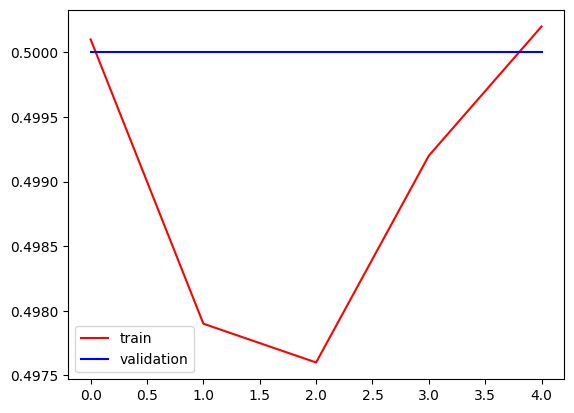

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## ResNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define the ResNet block
def resnet_block(x, filters, kernel_size=3, strides=1, activation='relu'):
    y = layers.Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation(activation)(y)
    y = layers.Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = layers.BatchNormalization()(y)

    # Shortcut connection
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = x

    # Merge
    y = layers.add([y, shortcut])
    y = layers.Activation(activation)(y)
    return y

# Build ResNet model
def build_resnet(input_shape, num_classes):
    input = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, 7, strides=2, padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Stack residual blocks
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layer
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=x)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust this according to your dataset
num_classes = 2  # Assuming binary classification

# Build the ResNet model
model_resnet = build_resnet(input_shape, num_classes)

# Compile the model
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print model summary
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_13 (Conv2D)          (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d_13[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 112, 112, 64)         0         ['batch_normalization[0][0

In [ ]:
# Train the model
history_resnet = model_resnet.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 96s 130ms/step - loss: 0.6626 - accuracy: 0.6489 - val_loss: 1.1997 - val_accuracy: 0.5018
Epoch 2/5
625/625 [==============================] - 80s 127ms/step - loss: 0.5132 - accuracy: 0.7478 - val_loss: 0.6471 - val_accuracy: 0.6598
Epoch 3/5
625/625 [==============================] - 83s 132ms/step - loss: 0.4331 - accuracy: 0.7976 - val_loss: 0.6387 - val_accuracy: 0.7304
Epoch 4/5
625/625 [==============================] - 80s 127ms/step - loss: 0.3545 - accuracy: 0.8420 - val_loss: 0.4430 - val_accuracy: 0.7914
Epoch 5/5
625/625 [==============================] - 83s 133ms/step - loss: 0.2846 - accuracy: 0.8768 - val_loss: 0.3602 - val_accuracy: 0.8420


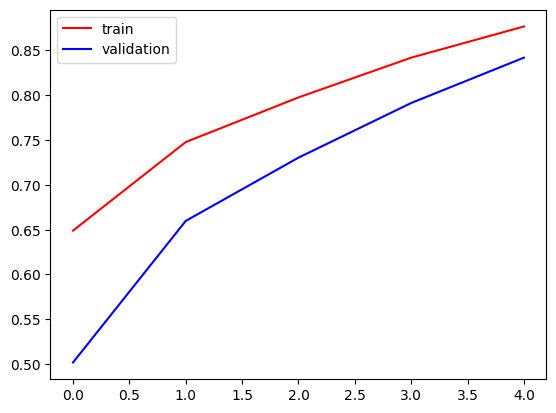

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_resnet.history['accuracy'],color='red',label='train')
plt.plot(history_resnet.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Mobile Net

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Build MobileNetV2 model
def build_mobilenet(input_shape, num_classes):
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    # Add classification head
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust this according to your dataset
num_classes = 2  # Assuming binary classification

# Build the MobileNetV2 model
model_mobilenet = build_mobilenet(input_shape, num_classes)

# Compile the model
model_mobilenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
# Print model summary
model_mobilenet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [ ]:
# Train the model
history_mobilenet = model_mobilenet.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 40s 64ms/step - loss: 0.0720 - accuracy: 0.9746 - val_loss: 0.0739 - val_accuracy: 0.9764
Epoch 2/5
625/625 [==============================] - 38s 61ms/step - loss: 0.0464 - accuracy: 0.9830 - val_loss: 0.0573 - val_accuracy: 0.9804
Epoch 3/5
625/625 [==============================] - 38s 60ms/step - loss: 0.0386 - accuracy: 0.9854 - val_loss: 0.0671 - val_accuracy: 0.9784
Epoch 4/5
625/625 [==============================] - 38s 60ms/step - loss: 0.0373 - accuracy: 0.9864 - val_loss: 0.0972 - val_accuracy: 0.9732
Epoch 5/5
625/625 [==============================] - 38s 60ms/step - loss: 0.0323 - accuracy: 0.9884 - val_loss: 0.0530 - val_accuracy: 0.9834


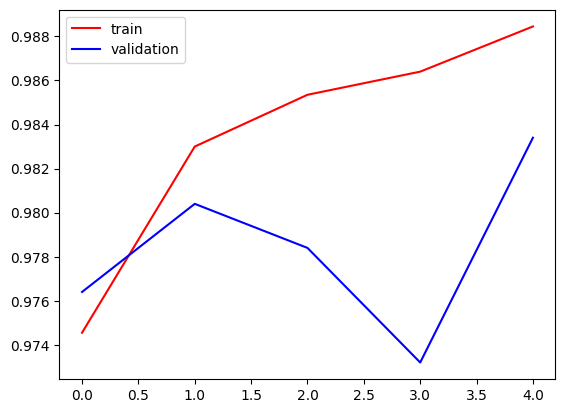

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_mobilenet.history['accuracy'],color='red',label='train')
plt.plot(history_mobilenet.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

## Testing model

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread(r'/content/IMG_20240109_105403.jpg')

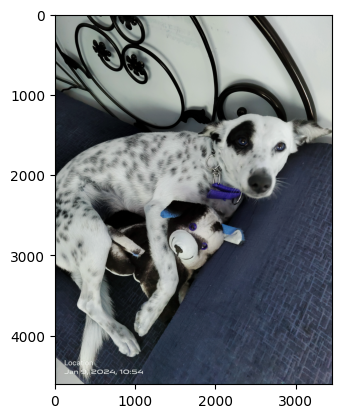

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(4608, 3456, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
result = model.predict(test_input)

1/1 [==============================] - 0s 358ms/step


In [ ]:
result

array([[1.]], dtype=float32)

In [ ]:
if result[0][0]>=0.5:
    prediction="dog"
else:
    prediction="cat"
print(prediction)

dog


## Conclusion: Three models based on CNN for classification  using architecture were VggNet ResNet and Mobile Net.
## The accuracy obtained were VggNet:50% ResNet:Around 80% MobileNet:97%
## The most accurate  was Mobile Net with 97% accuracy